In [1]:
import os, glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import Callback,EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.metrics import  classification_report

In [2]:
file_path = "C://Users//YASHASVI BHARDWAJ//Downloads//skin cancer detection//skin_cancer_detection_using_deeplearning//archive (2)//data//train"

In [3]:
name_class = os.listdir(file_path)
name_class

['benign', 'malignant']

In [4]:
filepaths = list(glob.glob(file_path+'/**/*.*'))

In [5]:
filepaths

['C://Users//YASHASVI BHARDWAJ//Downloads//skin cancer detection//skin_cancer_detection_using_deeplearning//archive (2)//data//train\\benign\\100.jpg',
 'C://Users//YASHASVI BHARDWAJ//Downloads//skin cancer detection//skin_cancer_detection_using_deeplearning//archive (2)//data//train\\benign\\1000.jpg',
 'C://Users//YASHASVI BHARDWAJ//Downloads//skin cancer detection//skin_cancer_detection_using_deeplearning//archive (2)//data//train\\benign\\1001.jpg',
 'C://Users//YASHASVI BHARDWAJ//Downloads//skin cancer detection//skin_cancer_detection_using_deeplearning//archive (2)//data//train\\benign\\1002.jpg',
 'C://Users//YASHASVI BHARDWAJ//Downloads//skin cancer detection//skin_cancer_detection_using_deeplearning//archive (2)//data//train\\benign\\1004.jpg',
 'C://Users//YASHASVI BHARDWAJ//Downloads//skin cancer detection//skin_cancer_detection_using_deeplearning//archive (2)//data//train\\benign\\1005.jpg',
 'C://Users//YASHASVI BHARDWAJ//Downloads//skin cancer detection//skin_cancer_detec

In [6]:
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))
labels

['benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',

In [7]:

filepath = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')
data = pd.concat([filepath, labels], axis=1)
data = data.sample(frac=1).reset_index(drop=True)
data.head(5)


,Filepath,Label
0,C://Users//YASHASVI BHARDWAJ//Downloads//skin ...,benign
1,C://Users//YASHASVI BHARDWAJ//Downloads//skin ...,malignant
2,C://Users//YASHASVI BHARDWAJ//Downloads//skin ...,benign
3,C://Users//YASHASVI BHARDWAJ//Downloads//skin ...,malignant
4,C://Users//YASHASVI BHARDWAJ//Downloads//skin ...,malignant


In [8]:
#balancing

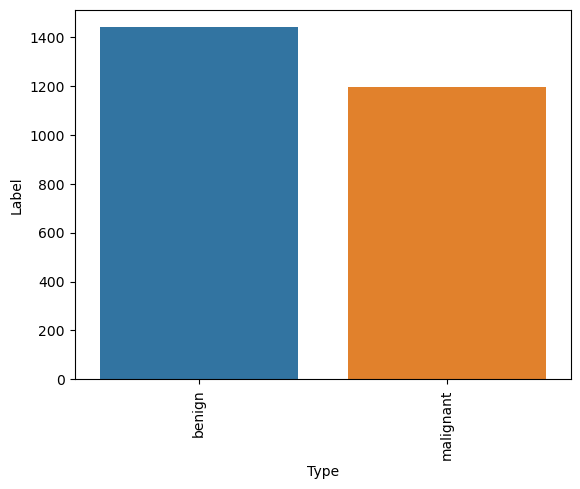

In [9]:
counts = data.Label.value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Type')
plt.xticks(rotation=90);

In [10]:
#balance by deleting extra images (Augmentor API)
#augmentation 
#GAN

In [11]:
train, test = train_test_split(data, test_size=0.25, random_state=42)

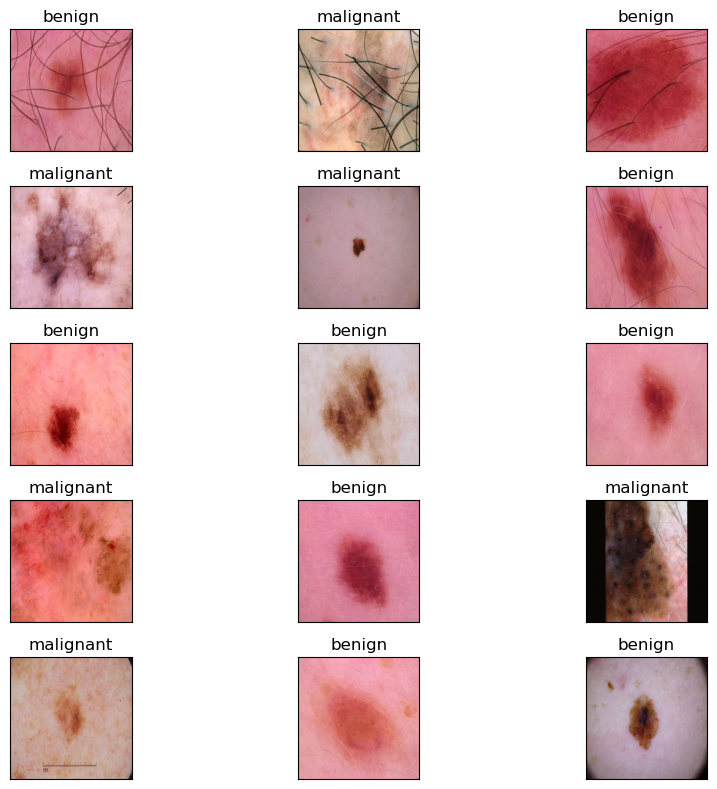

In [12]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(10,8), subplot_kw={'xticks':[],'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(data.Filepath[i]))
    ax.set_title(data.Label[i])
plt.tight_layout()
plt.show()

In [13]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [14]:
train_gen = train_datagen.flow_from_dataframe(
    dataframe=train,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42
)
valid_gen = train_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=42
)
test_gen = test_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 1977 validated image filenames belonging to 2 classes.
Found 660 validated image filenames belonging to 2 classes.
Found 660 validated image filenames belonging to 2 classes.


In [15]:
pretrained_model = ResNet50(
    input_shape=(100,100, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

In [16]:
inputs = pretrained_model.input

x = Dense(128, activation='relu')(pretrained_model.output)
x = Dense(128, activation='relu')(x)

outputs = Dense(2, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

In [17]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [18]:
my_callbacks  = [EarlyStopping(monitor='val_accuracy',
                              min_delta=0,
                              patience=2,
                              mode='auto')]

In [19]:
history = model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=10
)

Epoch 1/10
62/62 [==============================] - 49s 707ms/step - loss: 0.4221 - accuracy: 0.8048 - val_loss: 0.4089 - val_accuracy: 0.8106
Epoch 2/10
62/62 [==============================] - 41s 662ms/step - loss: 0.2975 - accuracy: 0.8705 - val_loss: 0.3455 - val_accuracy: 0.8288
Epoch 3/10
62/62 [==============================] - 42s 678ms/step - loss: 0.2523 - accuracy: 0.8877 - val_loss: 0.3635 - val_accuracy: 0.8455
Epoch 4/10
62/62 [==============================] - 41s 668ms/step - loss: 0.2132 - accuracy: 0.9039 - val_loss: 0.3108 - val_accuracy: 0.8561
Epoch 5/10
62/62 [==============================] - 41s 665ms/step - loss: 0.1841 - accuracy: 0.9160 - val_loss: 0.3808 - val_accuracy: 0.8409
Epoch 6/10
62/62 [==============================] - 42s 673ms/step - loss: 0.1659 - accuracy: 0.9236 - val_loss: 0.3362 - val_accuracy: 0.8530
Epoch 7/10
62/62 [==============================] - 42s 677ms/step - loss: 0.1316 - accuracy: 0.9444 - val_loss: 0.3814 - val_accuracy: 0.8470

In [20]:
model.save("model_resnet50.h5")  

C:\ProgramData\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


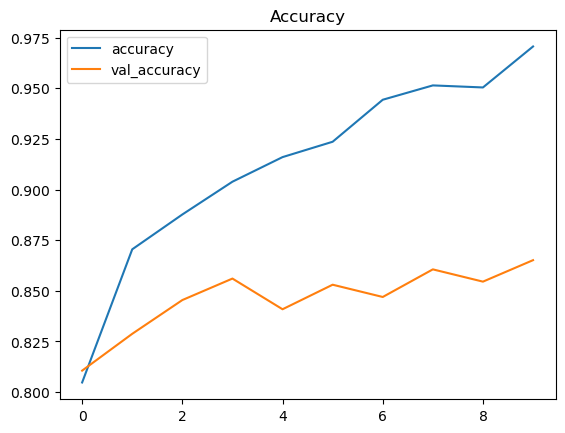

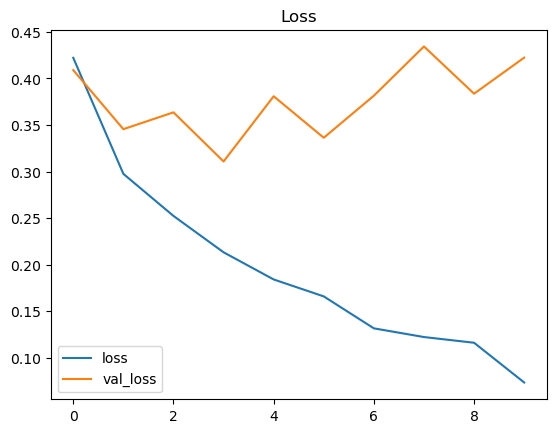

In [21]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

In [22]:
results = model.evaluate(test_gen, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 0.42227
Test Accuracy: 86.52%


In [23]:
# Predict the label of the test_gen
pred = model.predict(test_gen)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_gen.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

21/21 [==============================] - 10s 421ms/step


In [24]:
y_test = list(test.Label)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

      benign       0.87      0.89      0.88       365
   malignant       0.86      0.83      0.85       295

    accuracy                           0.87       660
   macro avg       0.86      0.86      0.86       660
weighted avg       0.87      0.87      0.86       660



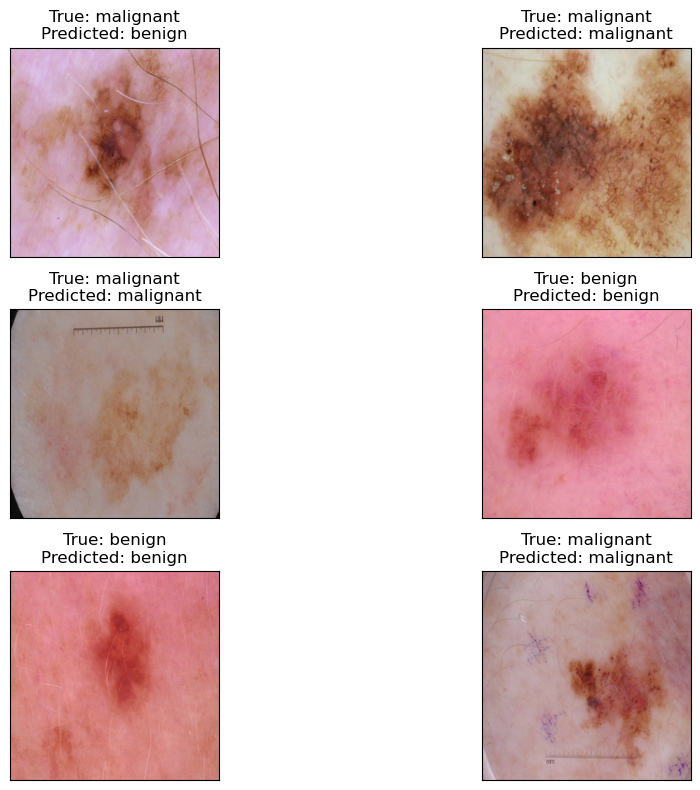

In [36]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 8),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test.Filepath.iloc[i]))
    ax.set_title(f"True: {test.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()

In [37]:
import cv2
import numpy as np
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input

img_path = 'C://Users//YASHASVI BHARDWAJ//Downloads//skin cancer detection//skin_cancer_detection_using_deeplearning//archive (2)//data//test//benign//57.jpg'

#img = image.load_img(img_path, target_size=(224, 224))
#x = img.img_to_array(img)

img = cv2.imread(img_path)
img = cv2.resize(img, (100, 100))

x = np.expand_dims(img, axis=0)
x = preprocess_input(x)
result = model.predict(x)
print((result*100).astype('int'))

#print('Input image shape:', x.shape)

#my_image = imread(img_path)
#imshow(my_image)


1/1 [==============================] - 0s 464ms/step
[[99  0]]


In [27]:
from tensorflow.keras.models import load_model
loaded_model_imageNet = load_model("model_resnet50.h5")
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

In [38]:
import cv2
import numpy as np
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input

img_path = 'C://Users//YASHASVI BHARDWAJ//Downloads//skin cancer detection//skin_cancer_detection_using_deeplearning//archive (2)//data//test//malignant//792.jpg'

#img = image.load_img(img_path, target_size=(224, 224))
#x = img.img_to_array(img)

img = cv2.imread(img_path)
img = cv2.resize(img, (100, 100))

x = np.expand_dims(img, axis=0)
x = preprocess_input(x)
result = loaded_model_imageNet.predict(x)
print((result*100).astype('int'))

#print('Input image shape:', x.shape)

#my_image = imread(img_path)
#imshow(my_image)


1/1 [==============================] - 0s 285ms/step
[[ 3 96]]


In [39]:
p=list((result*100).astype('int'))
pp=list(p[0])
print(pp)

[3, 96]


In [40]:
print("Largest element is:", max(pp))

Largest element is: 96


In [41]:
index = pp.index(max(pp))

In [42]:
name_class=['benign', 'Melignant']

In [43]:
name_class[index]

'Melignant'

In [44]:
plt.imread(img_path)

array([[[147, 106,  86],
        [146, 105,  85],
        [135,  92,  73],
        ...,
        [125,  77,  57],
        [128,  80,  60],
        [130,  82,  62]],

       [[145, 104,  86],
        [141, 100,  80],
        [131,  88,  69],
        ...,
        [126,  78,  58],
        [126,  78,  58],
        [123,  75,  55]],

       [[133,  95,  76],
        [130,  89,  71],
        [124,  83,  63],
        ...,
        [130,  79,  60],
        [130,  79,  58],
        [127,  76,  55]],

       ...,

       [[165, 127, 114],
        [157, 119, 106],
        [159, 121, 108],
        ...,
        [143,  90,  74],
        [153, 101,  87],
        [151,  99,  86]],

       [[169, 133, 119],
        [163, 127, 113],
        [162, 126, 114],
        ...,
        [148,  96,  82],
        [150,  98,  85],
        [149,  97,  84]],

       [[175, 139, 127],
        [169, 133, 121],
        [157, 123, 111],
        ...,
        [149,  97,  83],
        [147,  98,  84],
        [152, 102,  91]]

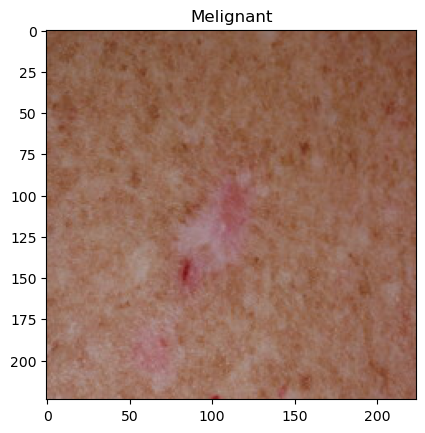

In [45]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(img_path)
imgplot = plt.imshow(img)
plt.title(name_class[index])
plt.show()